<a href="https://colab.research.google.com/github/benvictoria21/AnalyzeStocks/blob/master/Reckitt_Benckiser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install  yfinance

In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import pandas_datareader
import sqlite3
import yfinance

In [28]:
RB = "RB" 

In [29]:
RB = yfinance.download(RB)

RB

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-17,26.480000,26.580000,26.480000,26.580000,26.580000,1000
2008-01-23,25.320000,25.320000,24.969999,24.969999,24.969999,375
2008-02-11,26.155001,26.155001,26.155001,26.155001,26.155001,100
2008-03-17,26.170000,26.170000,26.170000,26.170000,26.170000,100
2008-04-17,27.910000,27.910000,27.910000,27.910000,27.910000,1300
...,...,...,...,...,...,...
2017-09-29,89.500000,89.500000,89.500000,89.500000,89.500000,0
2017-10-02,89.500000,89.500000,89.500000,89.500000,89.500000,0
2017-10-03,89.500000,89.500000,89.500000,89.500000,89.500000,0


In [26]:
RB.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-17,26.480000,26.580000,26.480000,26.580000,26.580000,1000
2008-01-23,25.320000,25.320000,24.969999,24.969999,24.969999,375
2008-02-11,26.155001,26.155001,26.155001,26.155001,26.155001,100
2008-03-17,26.170000,26.170000,26.170000,26.170000,26.170000,100
2008-04-17,27.910000,27.910000,27.910000,27.910000,27.910000,1300


In [10]:
 RB.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-09-29,89.5,89.5,89.5,89.5,89.5,0
2017-10-02,89.5,89.5,89.5,89.5,89.5,0
2017-10-03,89.5,89.5,89.5,89.5,89.5,0
2017-10-04,89.5,89.5,89.5,89.5,89.5,0
2017-10-05,89.5,89.5,89.5,89.5,89.5,0


In [11]:
 RB.describe()

,Open,High,Low,Close,Adj Close,Volume
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,79.600733,79.606910,79.584398,79.591704,79.591704,38.189320
std,23.011218,23.010046,23.005042,23.005478,23.005478,333.625047
min,0.042000,0.047000,0.042000,0.047000,0.047000,0.000000
25%,83.250000,83.250000,83.250000,83.250000,83.250000,0.000000
50%,85.550003,85.550003,85.550003,85.550003,85.550003,0.000000
75%,92.599998,92.599998,92.599998,92.599998,92.599998,0.000000
max,100.099998,100.099998,100.099998,100.099998,100.099998,6000.000000


In [12]:
 RB.info

<bound method DataFrame.info of                  Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2008-01-17  26.480000  26.580000  26.480000  26.580000  26.580000    1000
2008-01-23  25.320000  25.320000  24.969999  24.969999  24.969999     375
2008-02-11  26.155001  26.155001  26.155001  26.155001  26.155001     100
2008-03-17  26.170000  26.170000  26.170000  26.170000  26.170000     100
2008-04-17  27.910000  27.910000  27.910000  27.910000  27.910000    1300
...               ...        ...        ...        ...        ...     ...
2017-09-29  89.500000  89.500000  89.500000  89.500000  89.500000       0
2017-10-02  89.500000  89.500000  89.500000  89.500000  89.500000       0
2017-10-03  89.500000  89.500000  89.500000  89.500000  89.500000       0
2017-10-04  89.500000  89.500000  89.500000  89.500000  89.500000       0
2017-10-05  89.500000  89.500000  89.500000  89.500000  89.500000       0

[412 

In [13]:
 RB.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 412 entries, 2008-01-17 to 2017-10-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       412 non-null    float64
 1   High       412 non-null    float64
 2   Low        412 non-null    float64
 3   Close      412 non-null    float64
 4   Adj Close  412 non-null    float64
 5   Volume     412 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 22.5 KB


In [18]:
conn = sqlite3.connect("RB.db")
c = conn.cursor()

In [19]:
conn = sqlite3.connect("RB.db")
c = conn.cursor()

In [22]:
 RB.to_sql("RB", conn, if_exists='replace')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:2663: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [33]:
#See data
c.execute("""SELECT * FROM  RB""")
rows = c.fetchall()
rows

[('2008-01-17 00:00:00',
  26.479999542236328,
  26.579999923706055,
  26.479999542236328,
  26.579999923706055,
  26.579999923706055,
  1000),
 ('2008-01-23 00:00:00',
  25.31999969482422,
  25.31999969482422,
  24.969999313354492,
  24.969999313354492,
  24.969999313354492,
  375),
 ('2008-02-11 00:00:00',
  26.155000686645508,
  26.155000686645508,
  26.155000686645508,
  26.155000686645508,
  26.155000686645508,
  100),
 ('2008-03-17 00:00:00',
  26.170000076293945,
  26.170000076293945,
  26.170000076293945,
  26.170000076293945,
  26.170000076293945,
  100),
 ('2008-04-17 00:00:00',
  27.90999984741211,
  27.90999984741211,
  27.90999984741211,
  27.90999984741211,
  27.90999984741211,
  1300),
 ('2008-06-11 00:00:00', 28.875, 28.875, 28.875, 28.875, 28.875, 90),
 ('2008-08-13 00:00:00',
  28.229999542236328,
  28.229999542236328,
  28.229999542236328,
  28.229999542236328,
  28.229999542236328,
  100),
 ('2008-09-10 00:00:00',
  28.229999542236328,
  28.364999771118164,
  28.200

In [24]:
RB.to_excel("RB.xls")

pd.read_excel("RB.xls")

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-01-17,26.480000,26.580000,26.480000,26.580000,26.580000,1000
1,2008-01-23,25.320000,25.320000,24.969999,24.969999,24.969999,375
2,2008-02-11,26.155001,26.155001,26.155001,26.155001,26.155001,100
3,2008-03-17,26.170000,26.170000,26.170000,26.170000,26.170000,100
4,2008-04-17,27.910000,27.910000,27.910000,27.910000,27.910000,1300
...,...,...,...,...,...,...,...
407,2017-09-29,89.500000,89.500000,89.500000,89.500000,89.500000,0
408,2017-10-02,89.500000,89.500000,89.500000,89.500000,89.500000,0
409,2017-10-03,89.500000,89.500000,89.500000,89.500000,89.500000,0
410,2017-10-04,89.500000,89.500000,89.500000,89.500000,89.500000,0


findfont: Font family ['Comic Sans MS'] not found. Falling back to DejaVu Sans.


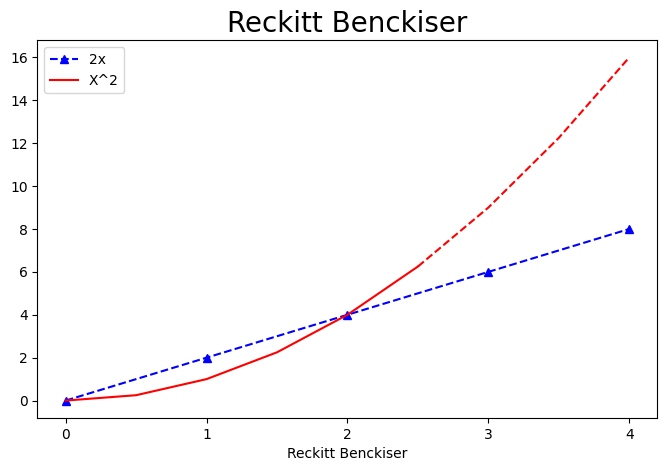

In [25]:
x = [0,1,2,3,4]
y = [0,2,4,6,8]

# Resize your Graph (dpi specifies pixels per inch. When saving probably should use 300 if possible)
plt.figure(figsize=(8,5), dpi=100)

# Line 1

# Keyword Argument Notation
#plt.plot(x,y, label='2x', color='red', linewidth=2, marker='.', linestyle='--', markersize=10, markeredgecolor='blue')

# Shorthand notation
# fmt = '[color][marker][line]'
plt.plot(x,y, 'b^--', label='2x')

## Line 2

# select interval we want to plot points at
x2 = np.arange(0,4.5,0.5)

# Plot part of the graph as line
plt.plot(x2[:6], x2[:6]**2, 'r', label='X^2')

# Plot remainder of graph as a dot
plt.plot(x2[5:], x2[5:]**2, 'r--')

# Add a title (specify font parameters with fontdict)
plt.title('Reckitt Benckiser', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})

# X and Y labels
plt.xlabel('Reckitt Benckiser')

# X, Y axis Tickmarks (scale of your graph)
plt.xticks([0,1,2,3,4,])
#plt.yticks([0,2,4,6,8,10])

# Add a legend
plt.legend()

# Save figure (dpi 300 is good when saving so graph has high resolution)
plt.savefig('mygraph.png', dpi=300)

# Show plot
plt.show()